# Le contexte

Vous êtes un data scientist pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la spécification des besoins, élaboration d’une problématique pertinente ainsi qu’une mise en oeuvre technique respectant les conditions ci-dessous. 

# Le livrable 
Jupyter notebook ou une application Streamlit 
le travail devra être déposé sur un gist/git (le lien devra être publique et actif jusqu’à la fin de la scolarité de l’étudiant) et devra être envoyé par mail ou messagerie Slack

# Contraintes 
Data avec minimum 10 colonnes 
Un maximum de commentaires dans le code
Texte type Markdown après chaque graphique/tableau (ex: description textuelle des features après chargement)
Tous les graphiques doivent être lisible (taille du graphique, infos représenté), si diagramme pas lisible, en faire une version filtrée dessous
Exposer concrètement votre problématique / question à définir : quel est le but de votre modèle et à quelle situation métier peut il correspondre ?

Partie 1 : Analyse graphique des données (EDA)
Diagrammes de répartition des données (type gaussienne sur les données)
Vérification du nombre de données, si plusieurs données sont peu représentés (<5%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres
Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder)
Boites à moustache avec données extrêmes
Heatmap + observations sur les corrélations

Partie 2: Model Building
Choisir 1 algorithmes et faire varier ses paramètres (ex: max_depth, n_estimators,….)
Faire une veille (300 mots minimum) sur votre algorithme et expliquer le choix de vos paramètres 
Affichage des metrics classique (precision, r2, confusion matrix, accuracy…)
Sélection du meilleur paramétrage (si pas le temps expliquer votre approche)
Le model est-il en overfitting/underfitting/OK ?

Partie 3: Features Importance 
Affichage sous forme de barplot (si classification sinon afficher les coefficients de votre regression et commentez)
Commentaire pertinents / hypothèse que vous pouvez formuler à partir de votre analyse

Partie 4: Model Réexécution avec les features sélectionnés
Affichage des metrics standard et commentaire sur la pertinence

## Peut-on prédire le risque de dépression chez une personne en fonction de son mode de vie ?


# Partie 1 : analyse


L'objet de cette étude, c'est d'analyser les différents facteurs de dépression chez une personne adulte. 

In [38]:
#Import des librairies utiles
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Initialisation du theme seaborn
sns.set_theme()

In [3]:
d1 = pd.read_csv("./data/b_depressed.csv");
d1

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

Pour évaluer les risques de dépression, nous avons des facteurs sociaux comme le niveau de vie, les investissements, les villes, marié des enfants ... mais aussi des élémens plus factuel comme l'age ou le sexe

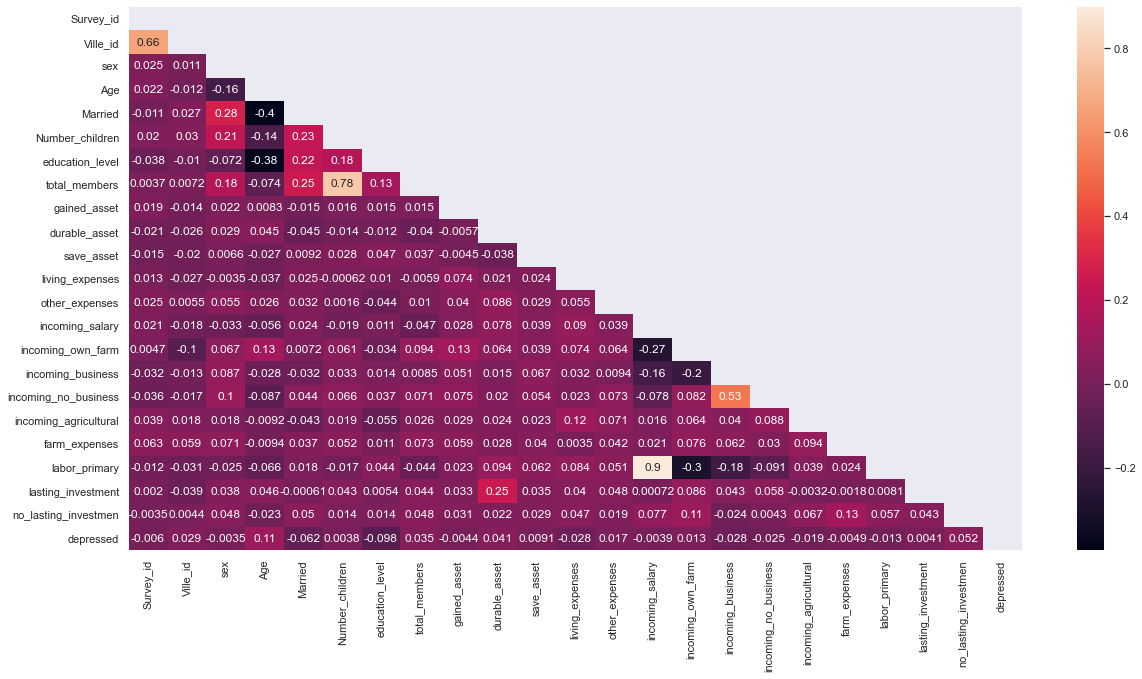

In [5]:
corr = d1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax =ax, mask=mask)
plt.savefig('heatmap.png')

### corrélation

La heatmap nous permet de voir la corrélation entre les différentes facteurs. Ici nous cherchons des points de corrélation entre la dépression "depressed" et les autres facteurs.
On oberve que les corrélations les plus fortes avec la dépression sont l'âge, le niveau d'éducation, le mariage ...
On observe aussi que malgré le fait que ca soit les facteurs de corrélation les plus fort, la corrélation n'est pas forte

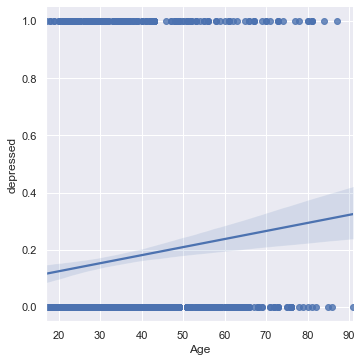

In [6]:
sns.lmplot(data=d1, x="Age", y="depressed")

On observe que le risque de dépression en fonction de l'âge est croissant. Plus l'on vieilli, plus on a de chande d'être en dépression. En revanche, on observ aussi qu'à partir de l'âge de 50 ans, la variance augmente. 

<AxesSubplot:xlabel='depressed', ylabel='Number_children'>

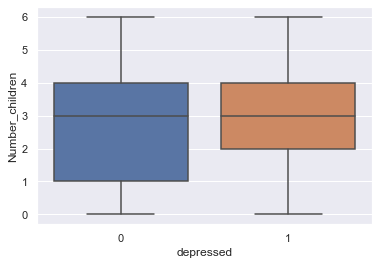

In [7]:
sns.boxplot(data=d1[d1['Number_children']<7], x="depressed", y="Number_children")

Cette boxplot nous permet de voir qu'il y a moins de personne déprimé qui n'ont que 1 enfant. En revanche, ce graphe montre aussi qu'il y a la même proportion de personne déprimé ayant 2 à 4 enfants que de personnes non déprimé. 

## Corrélation entre les autres facteurs
Pour comprendre la corrélation entre la dépression et les autres facteurs, il est important de voir si les autres facteurs ont une corrélation importante. Par exemple, on va voir si le nombre d'enfant et le niveau d'éducation ont une corrélation forte. Selon la HeatMap, la corrélation est de 0.18

<AxesSubplot:xlabel='education_level', ylabel='Married'>

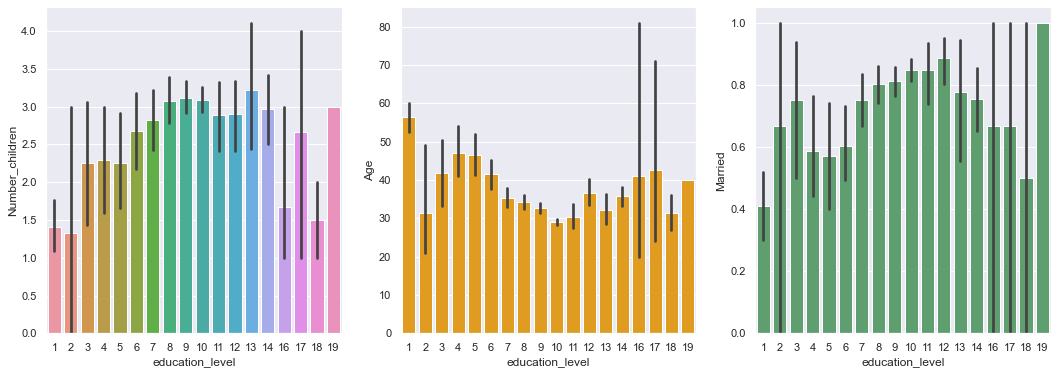

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(data=d1, x="education_level", y="Number_children", ax=ax[0])
sns.barplot(data=d1, x="education_level", y="Age", color='orange', ax=ax[1])
sns.barplot(data=d1, x="education_level", y="Married", color='g' , ax=ax[2])

On observe ici que les milieux d'éducation entre 8 et 14 ont le même comportement sur le nombre d'enfant. 
On observe aussi qu'à faible niveau d'éducation, les gens ont tendances à avoir moins d'enfant

On observe aussi que le comportement est identique entre le nombre d'enfant par rapport au niveau d'éducation et le fait d'être marié par rapport au niveau d'éducation.
Selon la heatmap, la corrélation entre le nombre d'enfant et le fait d'être marié est de 0,23

Observation sur le niveau d'éducation en fonction de l'âge, on remarque que dans les niveaux 16 et 17 d'éducation, la variance est forte

<AxesSubplot:xlabel='Number_children', ylabel='Married'>

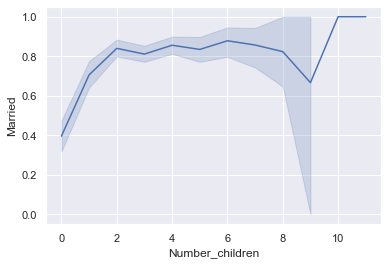

In [9]:
sns.lineplot(data=d1, y="Married", x='Number_children') 

On observe ici que les gens qui n'ont pas d'enfant se marient moins. Et l'on remarque que le nombre de personne marié devient croissant entre 0 et 2. Cela se stabilise jusqu'à 8 enfants. 

# Partie 2 : Model Building

Veille disponible en format PDF : "Veille_Machine_learning.pdf"

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [26]:
columns = ['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 
        'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses',
       'labor_primary', 'lasting_investment', 'depressed']

In [27]:
X = d1[columns[:-1]]
y = d1[['depressed']]

On tri le jeu de données. Ce qui signifie que la colonne 'depressed' est stocké dans un nouveau DataFrame. Et on stock les autres données qui nous semble pertinente dans un autre DataFrame

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex                    1429 non-null   int64
 1   Age                    1429 non-null   int64
 2   Married                1429 non-null   int64
 3   Number_children        1429 non-null   int64
 4   education_level        1429 non-null   int64
 5   total_members          1429 non-null   int64
 6   gained_asset           1429 non-null   int64
 7   durable_asset          1429 non-null   int64
 8   save_asset             1429 non-null   int64
 9   living_expenses        1429 non-null   int64
 10  other_expenses         1429 non-null   int64
 11  incoming_salary        1429 non-null   int64
 12  incoming_own_farm      1429 non-null   int64
 13  incoming_business      1429 non-null   int64
 14  incoming_no_business   1429 non-null   int64
 15  incoming_agricultural  1429 non-null  

In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   depressed  1429 non-null   int64
dtypes: int64(1)
memory usage: 11.3 KB


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 19), (429, 19), (1000, 1), (429, 1))

In [30]:
d = dict.fromkeys(X.select_dtypes(np.int64).columns, np.int32)
X = X.astype(d)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex                    1429 non-null   int32
 1   Age                    1429 non-null   int32
 2   Married                1429 non-null   int32
 3   Number_children        1429 non-null   int32
 4   education_level        1429 non-null   int32
 5   total_members          1429 non-null   int32
 6   gained_asset           1429 non-null   int32
 7   durable_asset          1429 non-null   int32
 8   save_asset             1429 non-null   int32
 9   living_expenses        1429 non-null   int32
 10  other_expenses         1429 non-null   int32
 11  incoming_salary        1429 non-null   int32
 12  incoming_own_farm      1429 non-null   int32
 13  incoming_business      1429 non-null   int32
 14  incoming_no_business   1429 non-null   int32
 15  incoming_agricultural  1429 non-null  

In [31]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

In [32]:
scores = cross_val_score(clf, X_train, np.ravel(y_train,order='C'), scoring='accuracy').mean()
scores

0.8239999999999998

In [72]:
feature_imp = pd.Series(clf.feature_importances_, index=columns[:-1]).sort_values(ascending=False)
feature_imp

Age                      0.184467
education_level          0.105936
Number_children          0.078970
other_expenses           0.073908
lasting_investment       0.073284
durable_asset            0.070408
farm_expenses            0.067341
incoming_agricultural    0.067103
living_expenses          0.058984
gained_asset             0.051177
save_asset               0.047570
total_members            0.035285
Married                  0.022771
sex                      0.018632
incoming_own_farm        0.012378
incoming_no_business     0.009917
incoming_salary          0.007880
labor_primary            0.007472
incoming_business        0.006518
dtype: float64

<AxesSubplot:>

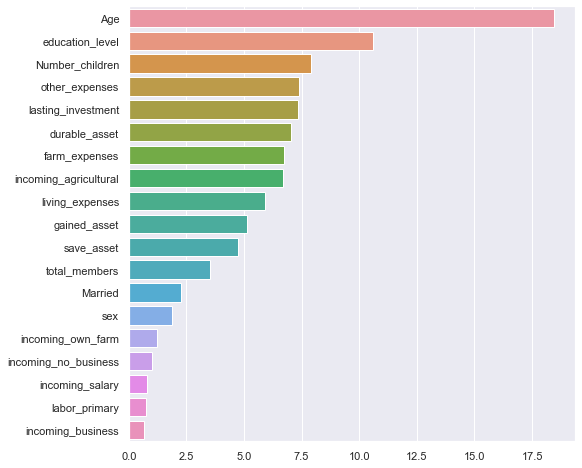

In [81]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=feature_imp.values*100, y=feature_imp.keys())

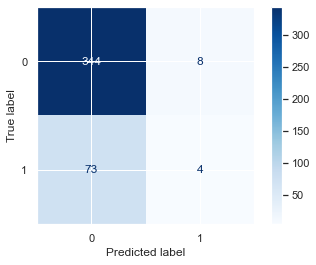

In [58]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

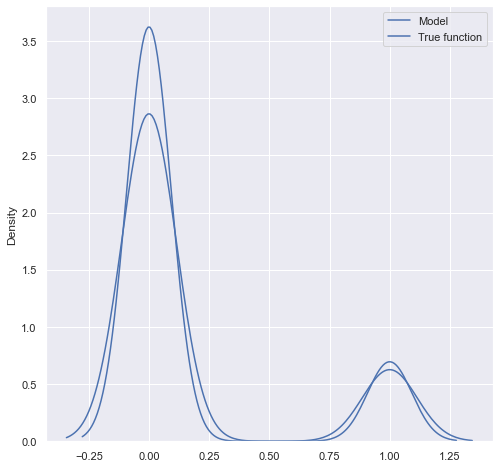

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=y_test, label='Model', color="r")
sns.kdeplot(data=y_train, label="True function", color="g")
plt.legend()
plt.show()

Il semble que les données ayant le plus d'importance pour produire se modèle soit en partie celle étudié lors de l'analyse de données : L'age, le niveau d'éducation, le nombre d'enfant ...